Project 2: Entanglement - Bell State Creation
Conceptual Overview



*   Start with two qubits in |00⟩
*   Create a Bell state: (|00⟩ + |11⟩)/√2


*   This is maximally entangled - measuring one qubit instantly determines the other
*   You'll NEVER see |01⟩ or |10⟩ in measurements








What's Happening Physically?




*   Initial state: |ψ⟩ = |00⟩ (both qubits in ground state)


*   After Hadamard on qubit 0: |ψ⟩ = (|00⟩ + |10⟩)/√2

*   After CNOT: |ψ⟩ = (|00⟩ + |11⟩)/√2 ← Bell state Φ⁺


*   Measurement:

    50% chance both collapse to |00⟩


    50% chance both collapse to |11⟩


    0% chance of |01⟩ or |10⟩ ← Perfect correlation!








In [2]:
# Install Qiskit (run this first in Colab)
!pip install qiskit qiskit-aer qiskit[visualization]

# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

  Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.17.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2a016a4cf3e3acb8f771885d58acfee87ae6847b67797089a229172a65c1b580
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc_entangled = QuantumCircuit(2,2)
# Step 2: Apply Hadamard to first qubit
# |00⟩ → (|00⟩ + |10⟩)/√2
qc_entangled.h(0)
# Step 3: Apply CNOT gate (Control: qubit 0, Target: qubit 1)
# (|00⟩ + |10⟩)/√2 → (|00⟩ + |11⟩)/√2  ← Bell state
qc_entangled.cx(0,1)
# Step 4: Measure both qubits
qc_entangled.measure([0,1],[0,1])


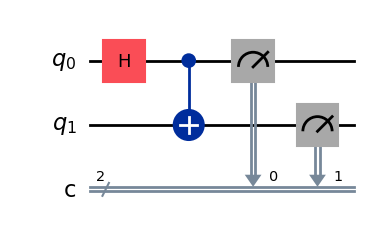

In [4]:
# Visualize the circuit
print("Entanglement Circuit")
qc_entangled.draw(output='mpl')
#

In [8]:
#simulate
simulator = AerSimulator()
compiled_circuit = transpile(qc_entangled, simulator)

job = simulator.run(compiled_circuit ,shots = 1024)
result = job.result()
counts = result.get_counts(qc_entangled)
print("\nMeasurement Results:")
print(counts)



Measurement Results:
{'00': 514, '11': 510}


In [9]:
# Step 6: Visualize
plot_histogram(counts, title='Entangled Bell State Measurements')
plt.show()

In [10]:
# Analyze correlations
total = sum(counts.values())
for outcome, count in counts.items():
  print(f"|{outcome}⟩: {count} times ({count/total*100:.1f}%)")

|00⟩: 514 times (50.2%)
|11⟩: 510 times (49.8%)


What's Happening Physically?

Initial state: |ψ⟩ = |00⟩ (both qubits in ground state)
After Hadamard on qubit 0: |ψ⟩ = (|00⟩ + |10⟩)/√2
After CNOT: |ψ⟩ = (|00⟩ + |11⟩)/√2 ← Bell state Φ⁺
Measurement:

50% chance both collapse to |00⟩
50% chance both collapse to |11⟩
0% chance of |01⟩ or |10⟩ ← Perfect correlation!